In [1]:

#connecting SQL to notebook

import mysql.connector


#connect to server

cnx = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="Savage",
    port ="3306")

query = "SELECT * FROM banking_case.customer"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


df = pd.read_sql(query, cnx)

cnx.close()


# Save DataFrame to a Pickle file
df.to_pickle('../data/interim/processed_data1.pkl')

/var/folders/1h/p19q72_n6jd160394z7mbl700000gn/T/ipykernel_80357/3925451655.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


In [3]:
#adjusting display settings
plt.style.use("seaborn-v0_8-deep")
plt.rcParams["figure.figsize"] = (14, 6)
plt.rcParams["figure.dpi"] = 150

(3000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         3000 non-null   object 
 1   name                3000 non-null   object 
 2   age                 3000 non-null   int64  
 3   account_num         3000 non-null   int64  
 4   date                3000 non-null   object 
 5   manager             3000 non-null   object 
 6   ethnicity           3000 non-null   object 
 7   job_title           3000 non-null   object 
 8   risk_level          3000 non-null   object 
 9   tier                3000 non-null   object 
 10  balance             3000 non-null   float64
 11  income              3000 non-null   float64
 12  dependents          3000 non-null   int64  
 13  interest_rate       3000 non-null   float64
 14  loan_amount         3000 non-null   float64
 15  credit_score        3000 non-null   float64


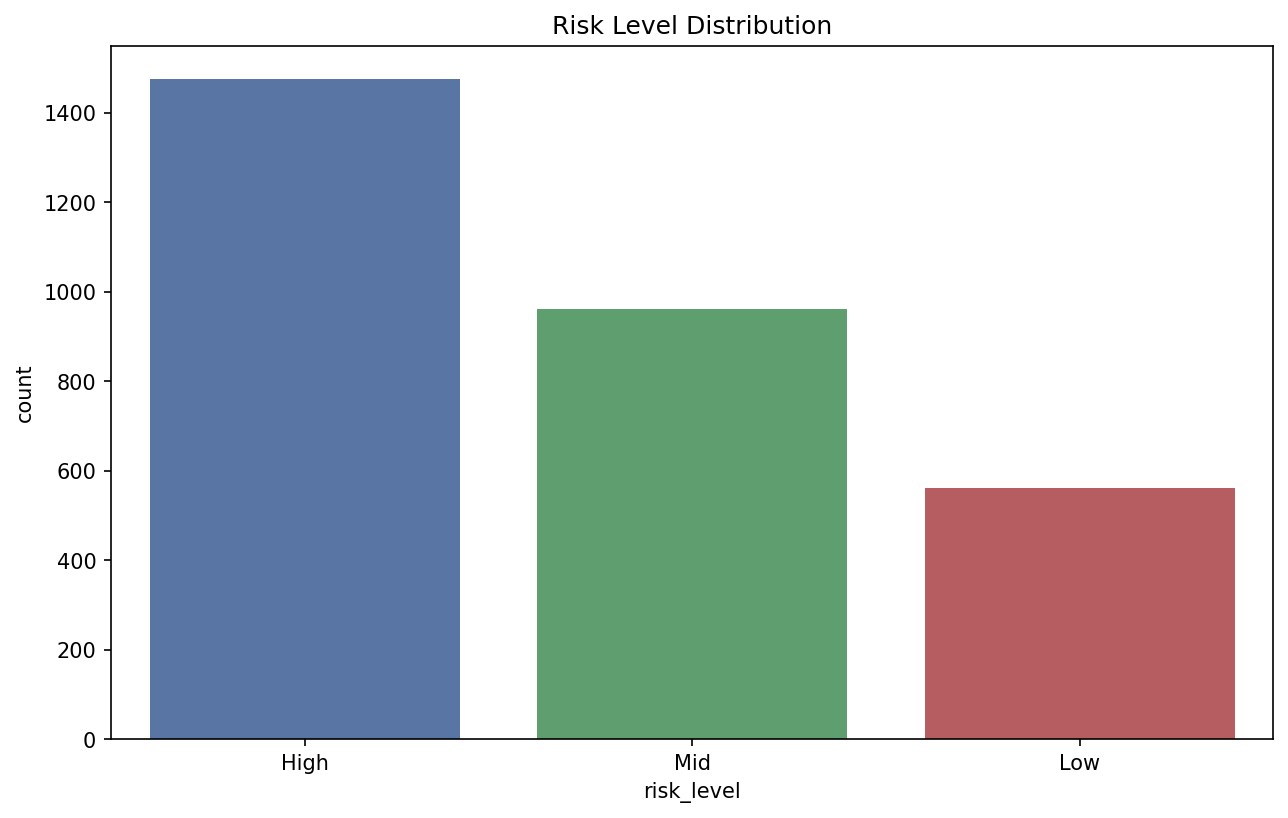

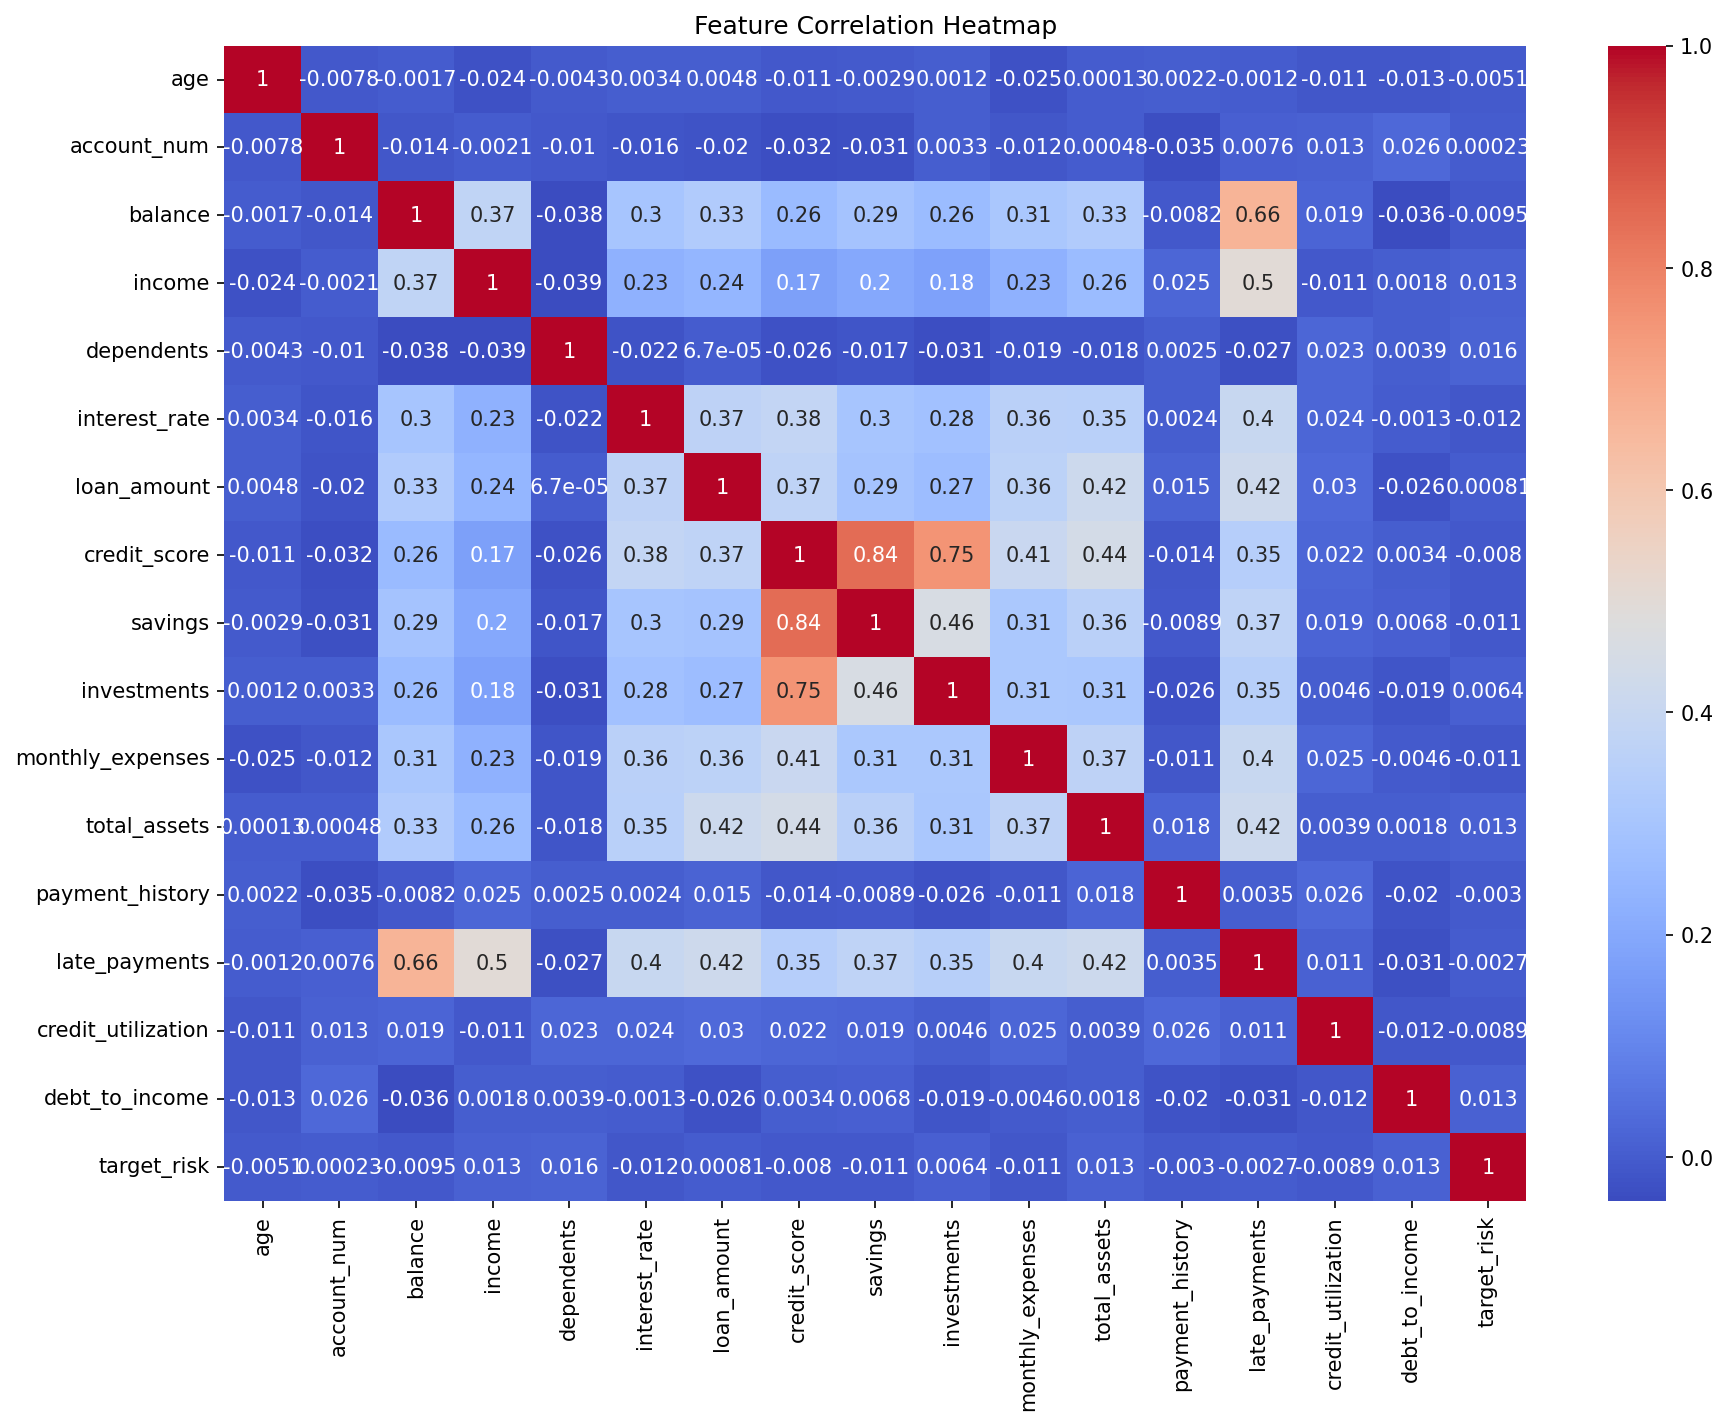

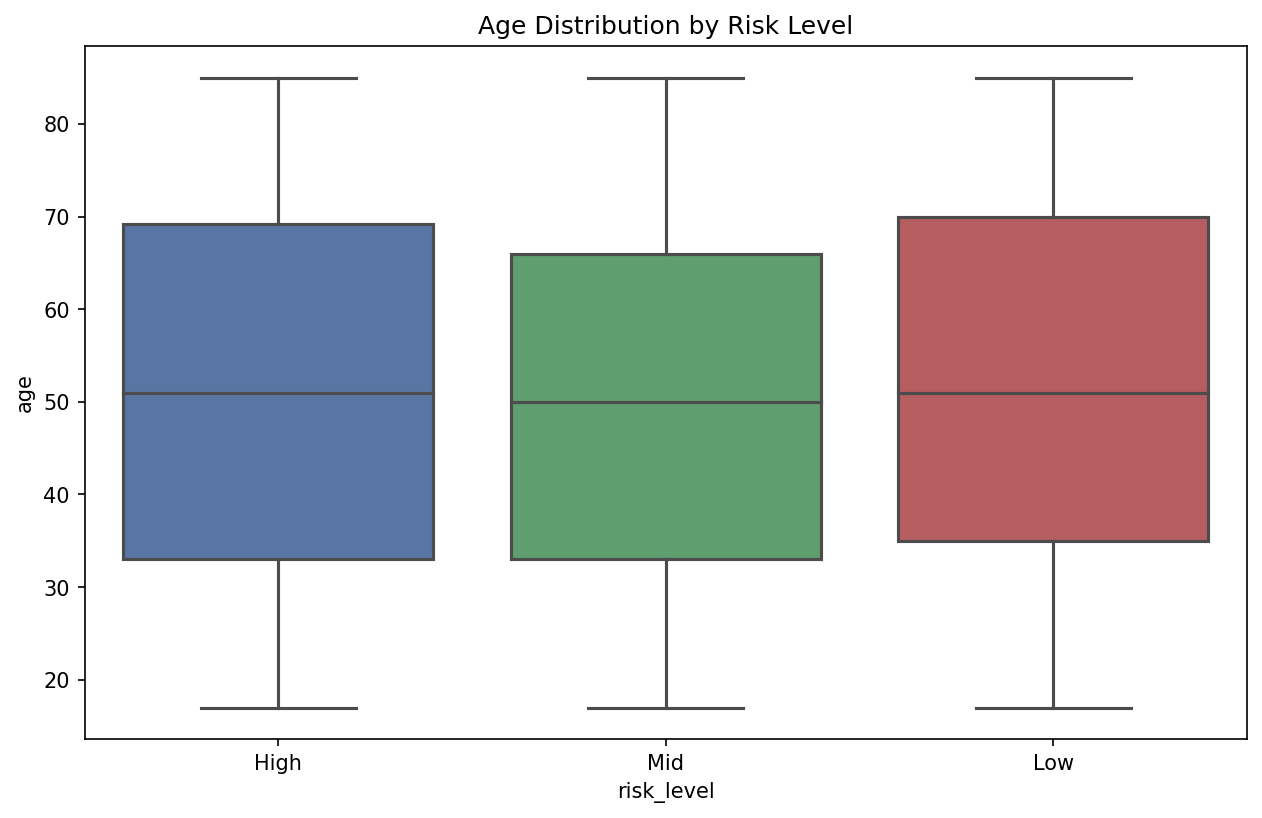

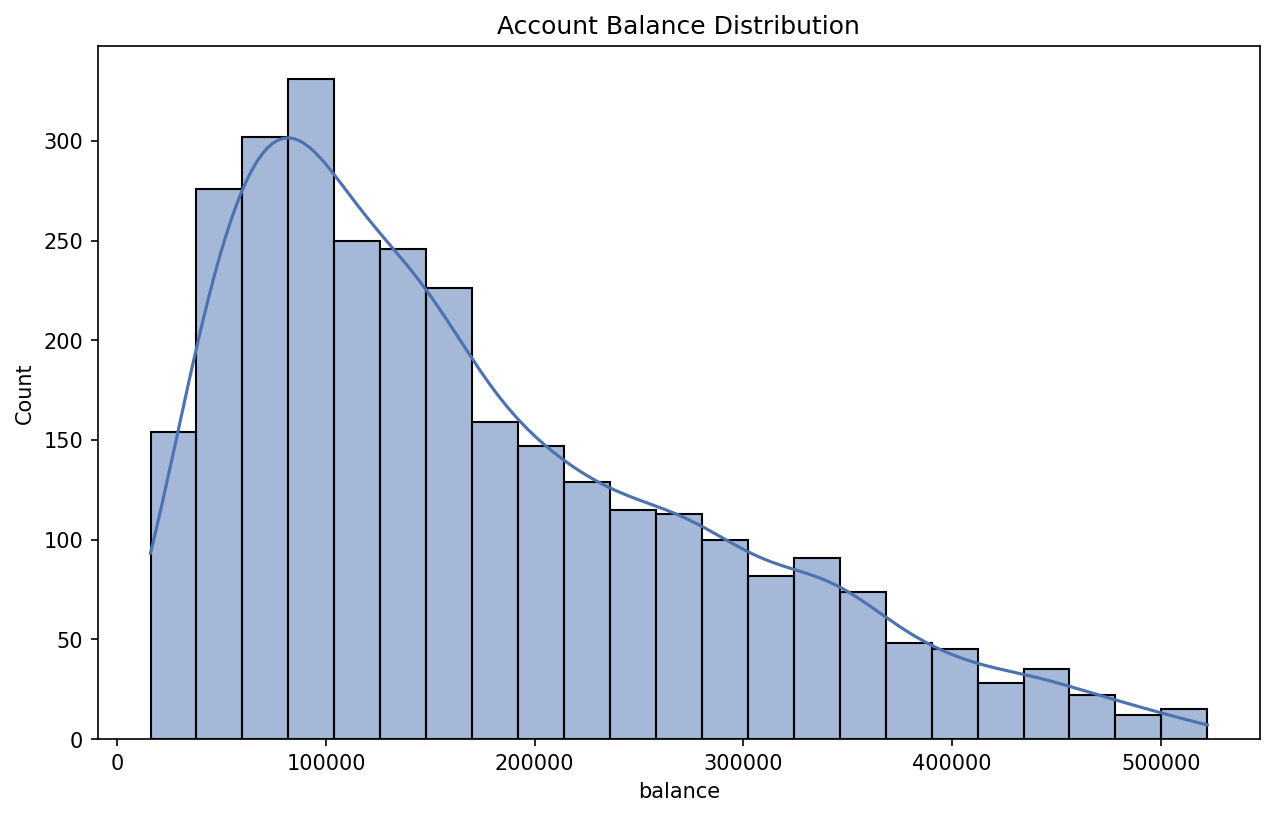

Key Insights:
1. Dataset size: 3000 customers
2. Risk distribution: {'High': 1476, 'Mid': 962, 'Low': 562}
3. Average balance: $171,305.03
4. High-risk customers: 1476
5. Correlation between balance and risk: 0.003


In [4]:


# Define column names (based on data structure)
columns = ['customer_id', 'name', 'age', 'account_num', 'date', 'manager', 
           'ethnicity', 'job_title', 'risk_level', 'tier', 'balance', 
           'income', 'dependents', 'interest_rate', 'loan_amount', 
           'credit_score', 'savings', 'investments', 'monthly_expenses', 
           'total_assets', 'payment_history', 'late_payments', 
           'credit_utilization', 'debt_to_income', 'target_risk']

df.columns = columns

# Basic info
print(df.shape)
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())

# Target distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='risk_level', data=df)
plt.title('Risk Level Distribution')
plt.show()

# Correlation heatmap
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(14, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Age vs Risk
plt.figure(figsize=(10, 6))
sns.boxplot(x='risk_level', y='age', data=df)
plt.title('Age Distribution by Risk Level')
plt.show()

# Balance distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], kde=True)
plt.title('Account Balance Distribution')
plt.show()

# Key insights
print("Key Insights:")
print(f"1. Dataset size: {df.shape[0]} customers")
print(f"2. Risk distribution: {df['risk_level'].value_counts().to_dict()}")
print(f"3. Average balance: ${df['balance'].mean():,.2f}")
print(f"4. High-risk customers: {len(df[df['risk_level']=='High'])}")
print(f"5. Correlation between balance and risk: {df['balance'].corr(df['risk_level'].map({'Low':0, 'Mid':1, 'High':2})):.3f}")

In [ ]:
df.head()

In [ ]:
#descriptive statistics

df.describe()

In [ ]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Med', 'High']

# use the existing 'income' column (column name in this dataframe) instead of 'Estimated Income'
df['Income Band'] = pd.cut(df['income'], bins=bins, labels=labels, right=False)

In [ ]:
df['Income Band'].value_counts().plot(kind='bar')

In [ ]:
# Examine the distribution of unique categories in categorical columns
# Select existing object/category dtype columns (robust against missing column names)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Ensure 'Income Band' is included if present (it may be categorical or new)
if 'Income Band' in df.columns and 'Income Band' not in categorical_cols:
    categorical_cols.append('Income Band')

for col in categorical_cols:
    print(f"Value Counts for '{col}':")
    display(df[col].value_counts())
    print('-' * 40)

## Univariate Analysis

In [ ]:
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Nationality')

In [ ]:

for col in categorical_cols:
  if col == "Occupation":
    continue
  #plt.figure(figsize=(8,4))
  sns.histplot(df[col])
  plt.title('Histogram of Occupation Count')
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

## Numerical Analysis

In [ ]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

# Univariate analysis and visualization
plt.figure(figsize=(14,6))
for i,col in enumerate(numerical_cols):
  plt.subplot(4,3,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
plt.show()

## HeatMaps

In [ ]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()